In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report
import numpy as np
import matplotlib.pyplot as plt

e:\python34\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def mul_re(filename):
    df=pd.read_csv(filename,usecols=['vmonth','age','sex','rfv1','rfv2','rfv3',\
                                         'diag13d'])
    df1=df.loc[df['diag13d']!='000']
    df1['diag13d'].value_counts()
    df2=pd.get_dummies(df1,columns=['rfv1','rfv2','rfv3'])
    dicts=df2['diag13d'].value_counts()#diag13d列的数据信息
    dict(dicts)
    sorted_dicts=sorted(dicts.iteritems(),key=lambda x:x[1],reverse=True)#字典化后进行排序
    labels=[]
    for each in range(10):
        labels.append(sorted_dicts[each][0])
#     df3=df2.loc[df2['diag13d'].isin(labels)==False]
    df4=df2.loc[df2['diag13d'].isin(labels)]
#     df3['diag13d']='others'
#     df5=pd.concat([df3,df4],ignore_index=True)
#     df5['diag13d']=df5['diag13d'].astype(str)
    df4=df4.reset_index(drop=True)
    df4.to_csv(filename.split('.')[0]+'_multi_only10.csv')

In [5]:
mul_re('OPD02SPS.csv')

In [6]:
df=pd.read_csv('OPD02SPS_multi_only10.csv')
df['diag13d']=df['diag13d'].astype(str) #!!读取时先做数据类型转换，否则出错

In [7]:
df['diag13d'].value_counts()

V22    1867
V20    1346
250    1044
401     916
296     841
V72     747
780     699
724     593
465     579
V70     524
Name: diag13d, dtype: int64

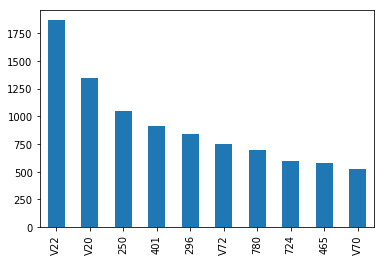

In [8]:
count_classes=pd.value_counts(df['diag13d'])
count_classes.plot(kind='bar')
plt.show()
#查看样本均衡情况

In [9]:
from sklearn.preprocessing import StandardScaler
df['normalAge']=StandardScaler().fit_transform(df['age'].reshape(-1,1))#归一化处理
df['normalMonth']=StandardScaler().fit_transform(df['vmonth'].reshape(-1,1))
df=df.drop(['age','vmonth'],axis=1)#删掉原有的列

e:\python34\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
e:\python34\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\python34\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
X=df.ix[:,df.columns!='diag13d']#导入特征和label
y=df.ix[:,df.columns=='diag13d']

e:\python34\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [11]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) 
#对数据集进行train-test切分

In [12]:
lr1=LogisticRegression(multi_class='multinomial',solver='newton-cg') 
#采用mvm多分类模型，solver采用newton-cg
#https://blog.csdn.net/cherdw/article/details/54891073
lr1.fit(X_train,y_train)
y_pred=lr1.predict(X_test.values)

e:\python34\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
y_pre=pd.DataFrame(y_pred)
y_test.reset_index(drop=True)

,diag13d
0,V22
1,465
2,250
3,V20
4,296
5,V72
6,250
7,465
8,250
9,724


In [16]:
print(classification_report(y_test,y_pre))#评估准确率，召回率，F1值
prob=lr1.predict_proba(X_test) 


             precision    recall  f1-score   support

        250       0.72      0.65      0.69       327
        296       0.82      0.82      0.82       244
        401       0.56      0.67      0.61       249
        465       0.85      0.75      0.80       183
        724       0.86      0.80      0.83       165
        780       0.79      0.70      0.74       212
        V20       0.86      0.94      0.90       410
        V22       0.93      0.97      0.95       540
        V70       0.61      0.61      0.61       184
        V72       0.76      0.67      0.71       233

avg / total       0.79      0.79      0.79      2747



In [17]:
print(prob[0])

[  5.23891777e-04   1.12297287e-03   9.53904281e-05   1.37112032e-03
   2.87336354e-04   1.15578524e-03   3.76095123e-04   9.92555246e-01
   7.59410836e-04   1.75275128e-03]
